<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/Malaria_cells_classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
#steps to download dataset from Kaggle
Please follow the steps below to download and use kaggle data within Google Colab:

Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

Click on Create New API Token - It will download kaggle.json file on your machine.

Go to your Google Colab project file and run the following commands:

1) ! pip install -q kaggle

2) from google.colab import files

files.upload()

Choose the kaggle.json file that you downloaded 3) ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

Make directory named kaggle and copy kaggle.json file there. 

4) ! chmod 600 ~/.kaggle/kaggle.json

Change the permissions of the file. 

5) ! kaggle datasets list

That's all ! You can check if everything's okay by running this command. Download Data 

! kaggle competitions download -c 'name-of-competition'
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

Use unzip command to unzip the data:

For example,

Create a directory named train,

! mkdir train

unzip train data there,

! unzip cell-images-for-detecting-malaria.zip

"""

In [0]:
import os
# Directory with our Parasitized pictures
train_para_dir = os.path.join('cell_images/Parasitized')

# Directory with our uninfected pictures
train_unin_dir = os.path.join('cell_images/Uninfected')

**Import libraries**

In [0]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

Using TensorFlow backend.


In [0]:
import os
import cv2
from PIL import Image

In [0]:
dataset = []
label = []

**Parasitized cell images**
I iterate through all images in the Parasitized folder. I check if the file extension of the file being read is png. I then resize the image to 64x64 and then save it to the dataset variable as numpy array. The label for this is set as 0.

In [11]:
for i in os.listdir(train_para_dir):
  print(i.split(".")[1])
  break

png


In [13]:
train_para_dir

'cell_images/Parasitized'

In [0]:
parasitized_images = os.listdir(train_para_dir)
for i, image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(train_para_dir+"/"+image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

**Uninfected cell images**
I iterate through all images in the Uninfected folder. I check if the file extension of the file being read is png. I then resize the image to 64x64 and then save it to the dataset variable as numpy array. The label for this is set as 1

In [17]:
train_unin_dir

'cell_images/Uninfected'

In [0]:
uninfected_images = os.listdir(train_unin_dir)
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(train_unin_dir + '/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

**Visualize data**

**Parasitized images**
Randomly select 5 values from the number of parasitized images and then display them in a row.

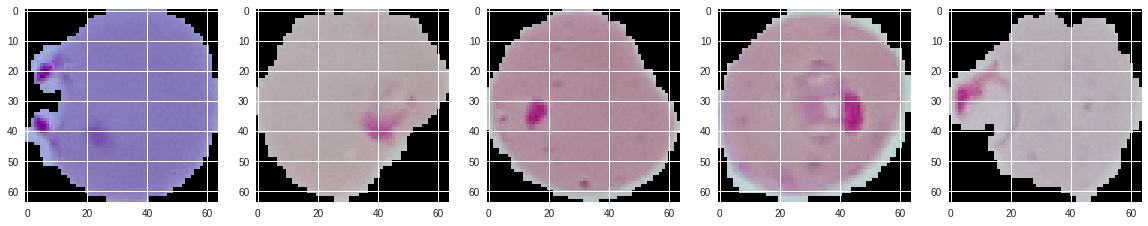

In [20]:
plt.figure(figsize = (20, 12))

for i , image_index in enumerate(np.random.randint(len(parasitized_images),size=5)):
  plt.subplot(1,5,i  + 1)
  plt.imshow(dataset[image_index])

**Uninfected images**
we randomly select 5 values from the number of uninfected images and then display them in a row. 

we add the count of images of parasitized images to these index such that I am now showing images with label 1.

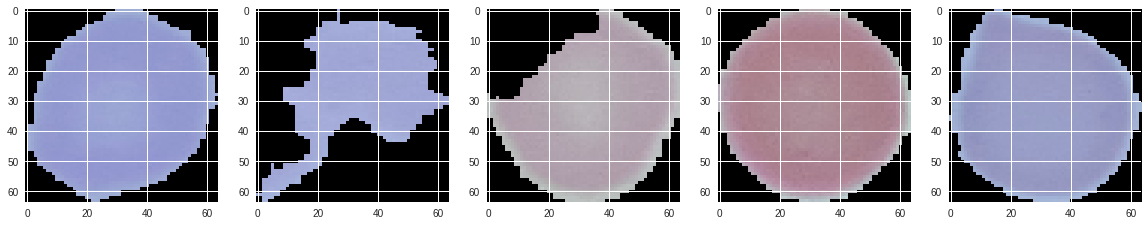

In [22]:
plt.figure(figsize = (20, 12))

for i,image_index in enumerate(np.random.randint(len(uninfected_images),size=5)):
  plt.subplot(1,5,i+1)
  plt.imshow(dataset[len(parasitized_images) + image_index])

**Applying CNN**

Convolutional Neural Networks with 2 Convolutional Layers followed by 2 Dense layers.

**Build the classifier**

In [0]:
classifier = None
classifier = Sequential()
#Convolutional layer 1
classifier.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization(axis=-1))
classifier.add(Dropout(0.2))

#Convolutional layer 2
classifier.add(Convolution2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization(axis=-1))
classifier.add(Dropout(0.2))


classifier.add(Flatten())

#Dense Layer 1
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))

#Dense Layer 2
classifier.add(Dense(activation='relu',units=256))
classifier.add(BatchNormalization(axis=-1))
classifier.add(Dropout(0.2))

#Final Output Layer
classifier.add(Dense(activation='sigmoid',units=2))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_11 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 14, 14, 32)        128       
__________

**Split the dataset**

I split the dataset into training and testing dataset.

Training data: 80%
Testing data: 20%


In [0]:
from keras.utils import to_categorical

X_train,X_test,y_train,y_test = train_test_split(dataset,to_categorical(np.array(label)),test_size=0.2,random_state=1)

**Training the model**

In [29]:
history = classifier.fit(np.array(X_train),y_train,batch_size=64,verbose=2,epochs=50,validation_split=0.1,shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 19841 samples, validate on 2205 samples
Epoch 1/50
 - 11s - loss: 0.4693 - acc: 0.7825 - val_loss: 0.5758 - val_acc: 0.8565
Epoch 2/50
 - 8s - loss: 0.2206 - acc: 0.9200 - val_loss: 0.1788 - val_acc: 0.9370
Epoch 3/50
 - 8s - loss: 0.1888 - acc: 0.9312 - val_loss: 0.1956 - val_acc: 0.9311
Epoch 4/50
 - 8s - loss: 0.1635 - acc: 0.9411 - val_loss: 0.1530 - val_acc: 0.9429
Epoch 5/50
 - 8s - loss: 0.1478 - acc: 0.9450 - val_loss: 0.2277 - val_acc: 0.9041
Epoch 6/50
 - 8s - loss: 0.1228 - acc: 0.9548 - val_loss: 0.1415 - val_acc: 0.9460
Epoch 7/50
 - 8s - loss: 0.1050 - acc: 0.9622 - val_loss: 0.1352 - val_acc: 0.9531
Epoch 8/50
 - 8s - loss: 0.0913 - acc: 0.9667 - val_loss: 0.1856 - val_acc: 0.9463
Epoch 9/50
 - 8s - loss: 0.0778 - acc: 0.9712 - val_loss: 0.1632 - val_acc: 0.9449
Epoch 10/50
 - 8s - loss: 0.0678 - acc: 0.9764 - val_loss: 0.1506 - val_acc: 0.9605
Epoch 11/50
 - 8s - loss: 0.0510 - acc: 0.9816 - val_loss: 0.1856 - val

**Accuracy Calculation**

In [34]:
classifier.evaluate(np.array(X_test), np.array(y_test))[1] * 100

5512/5512 [==============================] - 1s 191us/step


95.43722786647315

**Improving the accuracy with Augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale=1/255,
                                zoom_range = 0.3,
                                horizontal_flip = True,
                                rotation_range = 30)
test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(X_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)
test_generator = test_generator.flow(np.array(X_test),
                                    y_test,
                                    batch_size=64,
                                    shuffle=False)

Use **fit_generator** methods to train the model and test on the validation data.

In [38]:
history = classifier.fit_generator(train_generator,
                                   steps_per_epoch = len(X_train)/64,
                                   epochs = 50,
                                   shuffle = False)

Epoch 1/50
345/344 [==============================] - 31s 90ms/step - loss: 0.2529 - acc: 0.9231
Epoch 2/50
345/344 [==============================] - 31s 90ms/step - loss: 0.1820 - acc: 0.9382
Epoch 3/50
345/344 [==============================] - 31s 90ms/step - loss: 0.1758 - acc: 0.9408
Epoch 4/50
345/344 [==============================] - 31s 90ms/step - loss: 0.1686 - acc: 0.9431
Epoch 5/50
345/344 [==============================] - 31s 90ms/step - loss: 0.1614 - acc: 0.9462
Epoch 6/50
345/344 [==============================] - 31s 90ms/step - loss: 0.1608 - acc: 0.9458
Epoch 7/50
345/344 [==============================] - 31s 90ms/step - loss: 0.1537 - acc: 0.9490
Epoch 8/50
345/344 [==============================] - 31s 91ms/step - loss: 0.1514 - acc: 0.9491
Epoch 9/50
345/344 [==============================] - 31s 90ms/step - loss: 0.1518 - acc: 0.9476
Epoch 10/50
345/344 [==============================] - 31s 91ms/step - loss: 0.1481 - acc: 0.9494
Epoch 11/50
345/344 [========

In [40]:
classifier.evaluate_generator(test_generator, steps = len(X_test), verbose = 1)[1] * 100

5512/5512 [==============================] - 45s 8ms/step


95.82550681479785

With Data Augmentation the accuracy was improved. 

Such a technique can be highly useful whenever we have limited dataset. This can ensure proper training of the model.